# Capstone Project 1_ Exploratory Data

For phenotypic data:
 Is there a significant difference between my own data and data obtained from database?

For genotypic data:
 Is there any correalation between the SNP and Trait?

# # Python code used to answer the questions I asked

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
## combine cleaned data together: Option1 using pd.merge
cleaned_y = pd.read_csv('Yield.csv')
cleaned_p = pd.read_csv('protein.csv')
cleaned_o= pd.read_csv('oil.csv')
combined_yp = pd.merge(cleaned_y,cleaned_p,on='id',how='outer')
combined_ypo=pd.merge(combined_yp,cleaned_o,on='id',how='outer')
print(combined_ypo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 0 to 9820
Data columns (total 7 columns):
Unnamed: 0_x    9815 non-null float64
id              9821 non-null object
yield           7093 non-null float64
Unnamed: 0_y    9709 non-null float64
protein         9642 non-null float64
Unnamed: 0      9680 non-null float64
oil             9613 non-null float64
dtypes: float64(6), object(1)
memory usage: 613.8+ KB
None


In [4]:
combined_ypo.head()

,Unnamed: 0_x,id,yield,Unnamed: 0_y,protein,Unnamed: 0,oil
0,0.0,PI103414,2.28,0.0,37.7,0.0,21.6
1,1.0,PI132215,1.84,1.0,39.7,1.0,20.4
2,5.0,PI153214,1.82,5.0,41.1,5.0,18.2
3,6.0,PI153229,1.74,6.0,38.3,6.0,19.5
4,7.0,PI153236,2.07,7.0,39.0,7.0,20.4


In [5]:
combined_ypo.to_csv('combined_ypo.csv')

In [6]:
## combine cleaned data together: Option 2 using reduce
dfs = [cleaned_y,cleaned_p,cleaned_o]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id',how='outer'), dfs)

In [7]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 0 to 9820
Data columns (total 7 columns):
Unnamed: 0_x    9815 non-null float64
id              9821 non-null object
yield           7093 non-null float64
Unnamed: 0_y    9709 non-null float64
protein         9642 non-null float64
Unnamed: 0      9680 non-null float64
oil             9613 non-null float64
dtypes: float64(6), object(1)
memory usage: 613.8+ KB
None


#### two methods got same results

In [8]:
df_final.head()

,Unnamed: 0_x,id,yield,Unnamed: 0_y,protein,Unnamed: 0,oil
0,0.0,PI103414,2.28,0.0,37.7,0.0,21.6
1,1.0,PI132215,1.84,1.0,39.7,1.0,20.4
2,5.0,PI153214,1.82,5.0,41.1,5.0,18.2
3,6.0,PI153229,1.74,6.0,38.3,6.0,19.5
4,7.0,PI153236,2.07,7.0,39.0,7.0,20.4


In [9]:
## add a new column named as origin
origin=[]
for idx in df_final['id']:
    if idx.startswith('PI'):
        origin.append('germplasm')
    else: 
       origin.append('own_lines')


In [10]:
print(origin[:10])

['germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm']


In [11]:
df_final['origin']=origin

### Is there a significant difference between my own data and data obtained from database in agronomic traits?

In [12]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data =np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data =np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 =permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff



In [13]:
df_group=df_final[['id','yield','protein','oil','origin']]

In [14]:
df_group.head()

,id,yield,protein,oil,origin
0,PI103414,2.28,37.7,21.6,germplasm
1,PI132215,1.84,39.7,20.4,germplasm
2,PI153214,1.82,41.1,18.2,germplasm
3,PI153229,1.74,38.3,19.5,germplasm
4,PI153236,2.07,39.0,20.4,germplasm


In [15]:
g_data=df_group.loc[df_group['origin']=='germplasm']

In [16]:
own_data=df_group.loc[df_group['origin']=='own_lines']

In [17]:
## For yield 

In [19]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Text(0.5, 1.0, 'Yield')

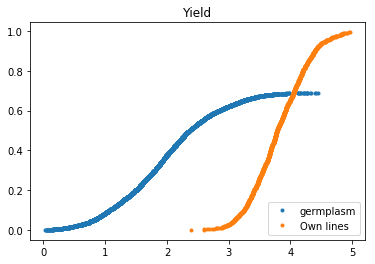

In [20]:
x_gy,y_gy = ecdf(g_data['yield'])
x_oy, y_oy = ecdf(own_data['yield'])


# Plot all ECDFs on the same plot
_=plt.plot(x_gy,y_gy,marker='.',linestyle='none')
_=plt.plot(x_oy,y_oy,marker='.',linestyle='none')

# Annotate the plot
plt.legend(('germplasm', 'Own lines', ), loc='lower right')
plt.title('Yield')

In [21]:
# Compute difference of mean impact force from experiment for yield: empirical_diff_means
empirical_diff_means = diff_of_means(g_data['yield'],own_data['yield'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(g_data['yield'],own_data['yield'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates>= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

print(len(perm_replicates))

p-value = 0.0
10000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [22]:
## for protein 

Text(0.5, 1.0, 'Protein')

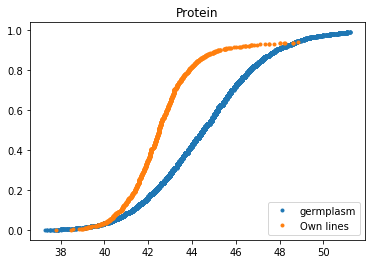

In [23]:
x_gy,y_gy = ecdf(g_data['protein'])
x_oy, y_oy = ecdf(own_data['protein'])


# Plot all ECDFs on the same plot
_=plt.plot(x_gy,y_gy,marker='.',linestyle='none')
_=plt.plot(x_oy,y_oy,marker='.',linestyle='none')

# Annotate the plot
plt.legend(('germplasm', 'Own lines', ), loc='lower right')
plt.title('Protein')

In [24]:
# Compute difference of mean impact force from experiment for protein: empirical_diff_means
empirical_diff_means = diff_of_means(g_data['protein'],own_data['protein'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(g_data['protein'],own_data['protein'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates>= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

print(len(perm_replicates))

p-value = 0.0
10000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [25]:
## for oil

Text(0.5, 1.0, 'Protein')

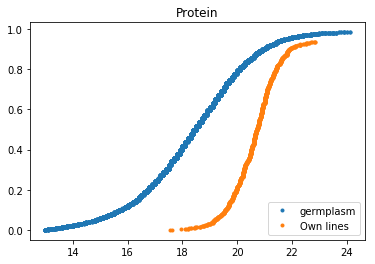

In [26]:
x_gy,y_gy = ecdf(g_data['oil'])
x_oy, y_oy = ecdf(own_data['oil'])


# Plot all ECDFs on the same plot
_=plt.plot(x_gy,y_gy,marker='.',linestyle='none')
_=plt.plot(x_oy,y_oy,marker='.',linestyle='none')

# Annotate the plot
plt.legend(('germplasm', 'Own lines', ), loc='lower right')
plt.title('Protein')

In [27]:
# Compute difference of mean impact force from experiment for oil: empirical_diff_means
empirical_diff_means = diff_of_means(g_data['oil'],own_data['oil'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(g_data['oil'],own_data['oil'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates>= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

print(len(perm_replicates))

p-value = 0.0
10000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


### Verification of the above analysis with t-test 

In [28]:
# conduct two-sample t-test for yield
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(g_data['yield'], own_data['yield'],nan_policy='omit')

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -76.41072605495663
p value = 0.0


In [29]:
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected")
else:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - cannot be rejected")

The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected


In [30]:
# conduct two-sample t-test for protein
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(g_data['protein'], own_data['protein'],nan_policy='omit')

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: 24.973510948052283
p value = 1.9430312020196627e-133


In [31]:
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected")
else:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - cannot be rejected")

The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected


In [32]:
# conduct two-sample t-test for oil
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(g_data['oil'], own_data['oil'],nan_policy='omit')

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -35.58444381308081
p value = 1.1981411415830783e-260


In [33]:
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected")
else:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - cannot be rejected")

The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected


## Is there any correalation between the SNP and Trait?

In [28]:
### Combine genotypy and phenotypic data
r_df_new1=pd.read_csv('geno_last.csv')

In [29]:
r_df_new1.head()

,Unnamed: 0,PI253651A,PI347550A,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417521,...,2012-177,2012-178,2012-180,2012-181,2012-182,2012-183,2012-184,2012-185,2012-186,maf
0,0,A,A,A,A,G,A,A,G,A,...,A,G,A,A,A,A,A,A,A,0.243728
1,1,C,C,C,C,T,C,C,T,C,...,C,T,C,C,C,C,C,C,C,0.242806
2,2,A,A,A,A,G,A,A,G,A,...,A,G,A,A,A,A,A,A,A,0.256784
3,3,G,G,G,G,G,G,G,A,G,...,G,G,G,G,G,G,G,G,G,0.082284
4,4,C,C,C,C,T,C,C,C,C,...,C,T,C,C,C,C,C,C,C,0.152893


In [30]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import pandas as pd
import argparse
import sys
import textwrap
import timeit
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df3=r_df_new1.iloc[:,1:]
df3.replace(to_replace='-', value='N', inplace=True)
df3.replace(to_replace=np.nan, value='N', inplace=True)
df3.replace(to_replace='U', value='N', inplace=True)
df3.replace(to_replace='W', value='H', inplace=True) 
df3.replace(to_replace='S', value='H', inplace=True) 
df3.replace(to_replace='M', value='H', inplace=True) 
df3.replace(to_replace='K', value='H', inplace=True) 
df3.replace(to_replace='R', value='H', inplace=True) 
df3.replace(to_replace='Y', value='H', inplace=True) 

In [32]:
df3.head()

,PI253651A,PI347550A,PI408055A,PI408069,PI408169A,PI408169B,PI416923,PI417472A,PI417521,PI423734,...,2012-177,2012-178,2012-180,2012-181,2012-182,2012-183,2012-184,2012-185,2012-186,maf
0,A,A,A,A,G,A,A,G,A,A,...,A,G,A,A,A,A,A,A,A,0.243728
1,C,C,C,C,T,C,C,T,C,C,...,C,T,C,C,C,C,C,C,C,0.242806
2,A,A,A,A,G,A,A,G,A,A,...,A,G,A,A,A,A,A,A,A,0.256784
3,G,G,G,G,G,G,G,A,G,G,...,G,G,G,G,G,G,G,G,G,0.082284
4,C,C,C,C,T,C,C,C,C,C,...,C,T,C,C,C,C,C,C,C,0.152893


In [33]:
df4=df3.drop(columns=['maf'])

In [34]:
r_df_new=pd.read_csv('Numeric data (0,1,2).csv')

In [35]:
r_df_new[:10]

,Unnamed: 0,2,3,4,5,6,7,8,9,10,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,2,2,0,2,0,2,2,2,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,2,2,2,2,0,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
9,10,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0


In [36]:
print(r_df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9765 entries, 0 to 9764
Columns: 35219 entries, Unnamed: 0 to 35219
dtypes: int64(35219)
memory usage: 2.6 GB
None


In [37]:
r_df_new.index=df4.columns


In [38]:
r_df_new.to_csv('012format_last.csv')

In [39]:
r_df_new.reset_index()[:10]

,index,Unnamed: 0,2,3,4,5,6,7,8,9,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0
5,PI408169B,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
6,PI416923,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,PI417472A,8,2,2,2,2,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
8,PI417521,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
9,PI423734,10,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0


In [40]:
r_df_new.index

Index(['PI253651A', 'PI347550A', 'PI408055A', 'PI408069', 'PI408169A',
       'PI408169B', 'PI416923', 'PI417472A', 'PI417521', 'PI423734',
       ...
       '2012-176', '2012-177', '2012-178', '2012-180', '2012-181', '2012-182',
       '2012-183', '2012-184', '2012-185', '2012-186'],
      dtype='object', length=9765)

In [41]:
#merge genotypic data and phenotypic data
g_plus_p=pd.merge(r_df_new,cleaned_y,left_on=r_df_new.index,right_on=cleaned_y.id,how='inner')

In [42]:
gplusp=g_plus_p.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','id'])

In [43]:
gplusp=gplusp.drop(columns=['key_0'])

In [44]:
gplusp[:10]

,2,3,4,5,6,7,8,9,10,11,...,35211,35212,35213,35214,35215,35216,35217,35218,35219,yield
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.43
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,2,3.29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.41
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,2,2,2,0,2,0,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1.93
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,NaN
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.77
7,2,2,2,2,0,2,2,0,2,2,...,0,0,0,0,0,0,0,0,0,NaN
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,2,2.32
9,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,0,0,0,0,1.54


## Check the relationship between SNPs and Yield data

In [45]:
import statsmodels.api as sm
pval_y ={}
for i in range((gplusp.shape[1]-1)): # rows are the number of rows in the matrix.
      
      model = sm.OLS(gplusp['yield'], np.asarray(gplusp.iloc[:,i]).reshape(-1, 1),missing='drop')
      results = model.fit()
      pval_y[gplusp.columns[i]]=results.f_pvalue

pvalues_y=pd.DataFrame.from_dict(pval_y,orient='index')

In [47]:
pvalues_y[:10]

,0
2,1.373336e-240
3,2.179748e-238
4,9.246612e-244
5,6.882550e-58
6,1.170234e-172
7,8.491712e-58
8,2.240050e-241
9,1.439752e-169
10,9.317352e-256
11,2.779074e-247


##  Check the relationship between SNPs and protein data

In [48]:
g_plus_p=pd.merge(r_df_new,cleaned_p,left_on=r_df_new.index,right_on=cleaned_p.id,how='inner')
gplusp_pr=g_plus_p.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','id','key_0'])
gplusp_pr[:10]

,2,3,4,5,6,7,8,9,10,11,...,35211,35212,35213,35214,35215,35216,35217,35218,35219,protein
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42.6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,2,44.7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46.7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43.2
4,2,2,2,0,2,0,2,2,2,2,...,0,0,0,0,0,0,0,0,0,45.8
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,45.8
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44.2
7,2,2,2,2,0,2,2,0,2,2,...,0,0,0,0,0,0,0,0,0,45.8
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,2,45.5
9,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,0,0,0,0,45.6


In [49]:
pval_pt ={}
for i in range((gplusp_pr.shape[1]-1)): # rows are the number of rows in the matrix.
      
      model = sm.OLS(gplusp_pr['protein'], np.asarray(gplusp_pr.iloc[:,i]).reshape(-1, 1),missing='drop')
      results = model.fit()
      pval_pt[gplusp_pr.columns[i]]=results.f_pvalue

pvalues_pr=pd.DataFrame.from_dict(pval_pt,orient='index')
pvalues_pr[:10]

,0
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,6.688369e-187
6,0.000000e+00
7,2.264186e-185
8,0.000000e+00
9,0.000000e+00
10,0.000000e+00
11,0.000000e+00


##  Check the relationship between SNPs and oil data

In [50]:
g_plus_p=pd.merge(r_df_new,cleaned_o,left_on=r_df_new.index,right_on=cleaned_o.id,how='inner')
gplusp_oil=g_plus_p.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','id','key_0'])

In [51]:
pval_oil ={}
for i in range((gplusp_oil.shape[1]-1)): # rows are the number of rows in the matrix.
      
      model = sm.OLS(gplusp_oil['oil'], np.asarray(gplusp_oil.iloc[:,i]).reshape(-1, 1),missing='drop')
      results = model.fit()
      pval_oil[gplusp_oil.columns[i]]=results.f_pvalue

pvalues_oil=pd.DataFrame.from_dict(pval_oil,orient='index')


In [52]:
pvalues_oil[:10]

,0
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,6.240028e-161
6,0.000000e+00
7,6.011674e-160
8,0.000000e+00
9,0.000000e+00
10,0.000000e+00
11,0.000000e+00


### Summary: I did find that a lot of SNP markers associated with each of three traits. This is a preliminary analsis without considering population structure and kinship among populations.